# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

In [72]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import \
    f1_score, \
    roc_auc_score, roc_curve, \
    accuracy_score, \
    confusion_matrix, ConfusionMatrixDisplay, \
    precision_score, recall_score 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LearningCurveDisplay, learning_curve

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [3]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [4]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.1)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(846, 18) (846, 1)
(761, 18) (761, 1) (85, 18) (85, 1) (297, 18) (297, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [5]:
X_train_pd = pd.DataFrame(X_train)
X_val_pd = pd.DataFrame(X_val)
X_test_pd = pd.DataFrame(X_test)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
462,97.0,47,81,183,64,8,168,39,20,150,193,426,182,70,11,2,192,198
409,86.0,38,86,175,60,9,170,39,21,134,191,433,138,68,1,28,191,199
816,90.0,48,85,157,64,11,161,43,20,167,175,375,186,74,3,16,185,195
698,83.0,42,71,152,64,7,149,45,19,142,172,331,158,74,2,2,184,190
465,82.0,43,71,154,68,7,150,45,19,143,171,330,173,78,7,11,181,186
541,88.0,34,58,140,59,6,127,52,18,130,148,243,113,63,4,10,199,206
290,98.0,38,66,130,55,7,130,51,18,138,160,251,123,69,3,12,191,194
296,98.0,52,86,207,69,5,192,33,22,161,212,570,221,75,4,6,194,195
667,110.0,53,104,223,66,10,211,32,24,164,223,659,210,67,5,16,190,203
8,86.0,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208


In [6]:

y_train.head(15)

,class
462,opel
409,saab
816,van
698,bus
465,bus
541,van
290,van
296,bus
667,saab
8,van


Methods `describe` and `info` deliver some useful information.

In [7]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,760.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,93.778947,44.946124,82.109067,169.035480,61.855453,8.645204,168.834428,41.045992,20.620237,147.850197,188.760841,440.721419,175.165572,72.511170,6.453351,12.546649,188.734560,195.666229
std,8.210253,6.519282,15.930521,33.392011,9.106829,5.140424,33.819006,8.974334,2.688486,15.289957,31.639800,177.330389,33.915785,7.808409,5.428554,9.041468,8.711334,7.477442
min,73.000000,33.000000,36.000000,73.000000,47.000000,2.000000,6.000000,26.000000,17.000000,20.000000,127.000000,184.000000,109.000000,60.000000,0.000000,0.000000,19.000000,181.000000
25%,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,319.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,587.000000,199.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,100.000000,112.000000,333.000000,199.000000,73.000000,265.000000,162.000000,40.000000,188.000000,320.000000,1018.000000,401.000000,135.000000,72.000000,41.000000,204.000000,211.000000


In [8]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 462 to 280
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       760 non-null    float64
 1   CIRCULARITY                       761 non-null    int64  
 2   DISTANCE CIRCULARITY              761 non-null    int64  
 3   RADIUS RATIO                      761 non-null    int64  
 4   PR.AXIS ASPECT RATIO              761 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           761 non-null    int64  
 6   SCATTER RATIO                     761 non-null    int64  
 7   ELONGATEDNESS                     761 non-null    int64  
 8   PR.AXIS RECTANGULARITY            761 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         761 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  761 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  761 non-null    int64  
 12  SCALED

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [9]:
def dropna(X_pd, y):
    X_pd = X_pd.dropna()
    y = y.loc[X_pd.index]
    return X_pd, y

In [10]:
X_train_pd, y_train = dropna(X_train_pd, y_train)
X_val_pd, y_val = dropna(X_val_pd, y_val)
X_test_pd, y_test = dropna(X_test_pd, y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

##### Regularization

In [11]:
def logreg(C, max_iter):
    m = LogisticRegression(solver='saga', tol=1e-3, max_iter=max_iter, C=C) # , multi_class='multinomial')
    m.fit(X_train_pd, np.ravel(y_train))
    y_pred = m.predict(X_val_pd)
    return m, f1_score(y_true=y_val, y_pred=y_pred, average='macro')

def small_grid_search(max_iter=500):
    x = []
    y = []

    for logC in np.linspace(-10, 10, 21):
        C = np.exp(logC)
        m, f1 = logreg(C, max_iter)
        
        x.append(-logC)
        y.append(f1)
    return x, y

In [146]:
x500, y500 = small_grid_search()

Text(0, 0.5, 'F_1 score')

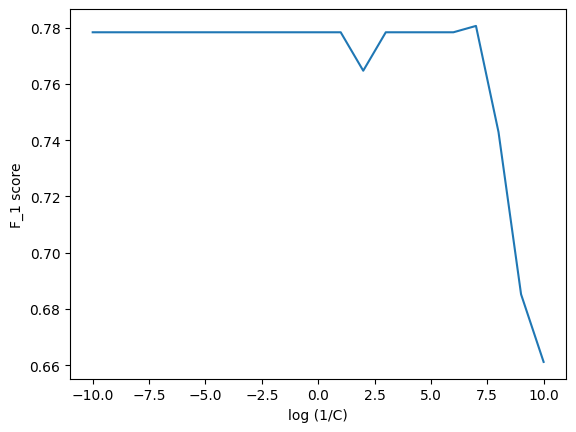

In [147]:
plt.plot(x500, y500)
plt.xlabel('log (1/C)')
plt.ylabel('F_1 score')

As regularization coefficient ($1/C$) decreases, the $F_1$ score increases, until $1/C$ reaches some critical value (significantly greater than 1) and $F_1$ stops increasing.

For high regularization coefficient $1/C$ (the right half of the plot), $F_1$ score is expected to be low since the regularization term exceeds the loss function by magnitutes and we end up <s>wasting iterations on shrinking the normal vector length, rather than finding its optimal direction (thus, if we increase $max\_iter$, $F_1$ improves.)</s>

However, we cannot decrease $1/C$ infinitely to improve $F_1$ -- we stumble into the critical value. 
The critical value exists since as the regularization coefficient decreases, the separating hyperplane stabilizes and only the length of the normal vector changes with the further decrease of $1/C$. And the length of the vector effects only the probabilities we assign to points, not their class (and $F_1$ accounts for the classes only.)

In [148]:
x1000000, y1000000 = small_grid_search(1000000)

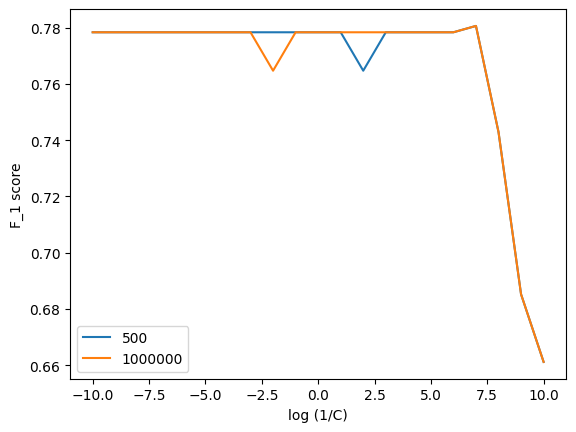

In [149]:
plt.plot(x500, y500, label='500')
plt.plot(x1000000, y1000000, label='1000000')
plt.xlabel('log (1/C)')
plt.ylabel('F_1 score')
plt.legend()

In fact, no, the increase of $max\_iter$ does not change anything, even the running time. So, why does high regularization coefficient reduce $F_1$? It seems that, if we have enough iterations, we can just shrink the normal vector in length, until its smallness evens out the great coefficient, and then adjust its directions as usual. 

But no, it doesn't work like that since when the normal vector $w$ gets too short, all the probabilities, which are just scalar products with $w$, get very small, too. And the improvement of loss under the adjustment of $w$'s direction might not exceed the tolerance and, thus, not be detected by the solver.

All in all, regularization should be chosen wisely (or with grid search).

(I will also try changing weights, but below.)

In [16]:
m, f1val = logreg(1, 500)
f1val

0.764681523628892

##### Metrics

$F_1$ above was calculated on validation dataset, and we need to recalculate for test:

In [17]:
y_pred = m.predict(X_test_pd)
y_pred[:15]

array(['van', 'saab', 'saab', 'saab', 'van', 'opel', 'bus', 'bus', 'bus',
       'opel', 'bus', 'opel', 'bus', 'van', 'saab'], dtype=object)

In [18]:
f1_macro = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
f1_micro = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
print(f1_macro, f1_micro)

0.7555764901443394 0.7609427609427609


The macro- and micro-$F_1$ scores are almost the same, which is the case for well-balanced classes and predictions (however, the equality does not imply well-balanced-ness, obviously). Let's check the balance

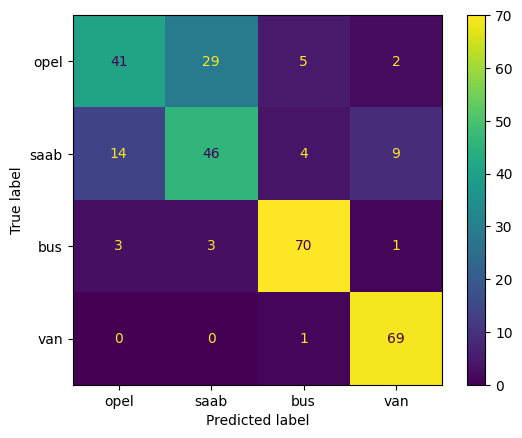

In [19]:
labels_order = ['opel', 'saab', 'bus', 'van']
def mk_confusion_matrix(y_true, y_pred):
    return ConfusionMatrixDisplay(
        confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels_order),
        display_labels=labels_order
    )
disp_confusion_matrix = mk_confusion_matrix(y_true=y_test, y_pred=y_pred)
disp_confusion_matrix.plot()

Since the classes are well-balanced (70-80 examples per class), and so are predictions (60-70 hits per label), the macro- and micro-scores are similar

In [20]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.7609427609427609

Compare to micro-$F_1$:

In [21]:
f1_micro

0.7609427609427609

It is the harmonic mean of micro-precision and micro-recall

In [22]:
print(precision_score(y_true=y_test, y_pred=y_pred, average='micro'))
print(recall_score(y_true=y_test, y_pred=y_pred, average='micro'))

0.7609427609427609
0.7609427609427609


All of those numbers are equal, all of a sudden... And this is no coincidence

In [23]:
print(precision_score(y_true=y_test[22:], y_pred=y_pred[22:], average='micro'))
print(recall_score(y_true=y_test[22:], y_pred=y_pred[22:], average='micro'))
print(accuracy_score(y_true=y_test[22:], y_pred=y_pred[22:]))

0.7818181818181819
0.7818181818181819
0.7818181818181819


Luckily, the Internet people did the Math for me:
https://stackoverflow.com/q/37358496/11143763

##### ROC and Confusion Matrix (mostly the latter, in fact)

In [24]:
y_pred_proba = m.predict_proba(X_test_pd)

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

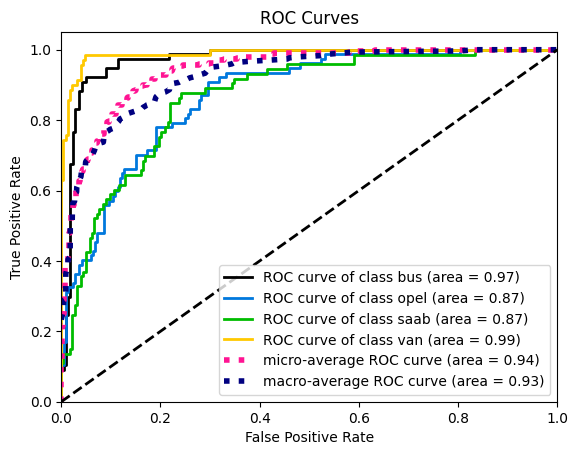

In [25]:
scikitplot.metrics.plot_roc(y_true=y_test, y_probas=y_pred_proba)

A sample gets the label that is most probable. Solid lines are obtained by sorting all samples by their probabilty of being in certain class. If this probability is the highest among the four classes, a step up is made, and a step left otherwise. Thus, solid lines show how dominated the probabilities of given class are (by probabilities for other classes.) 

To put it more specifically, if there is a not-so-low probability a car is an Opel, there is, often, an even higher probability to be something else (we do not know what). But if the probability to be a van or a bus is high, it is definitely a van or a bus.



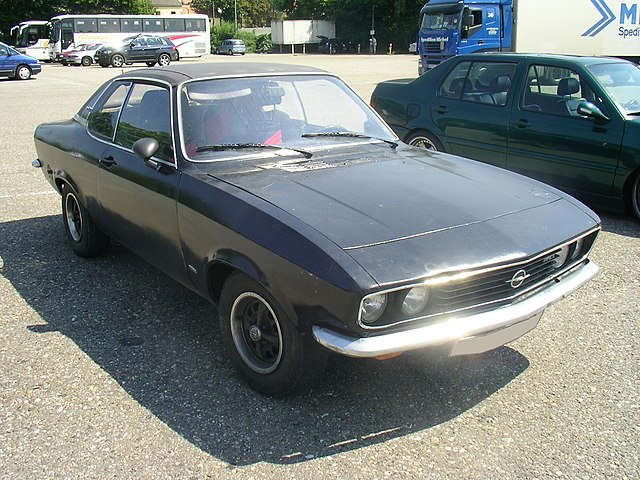

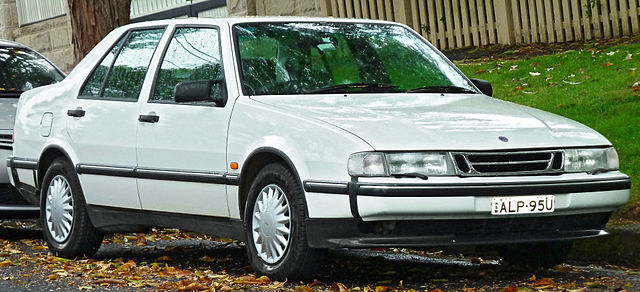

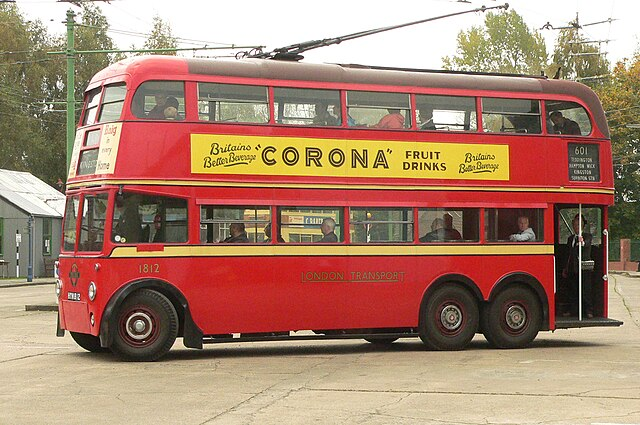

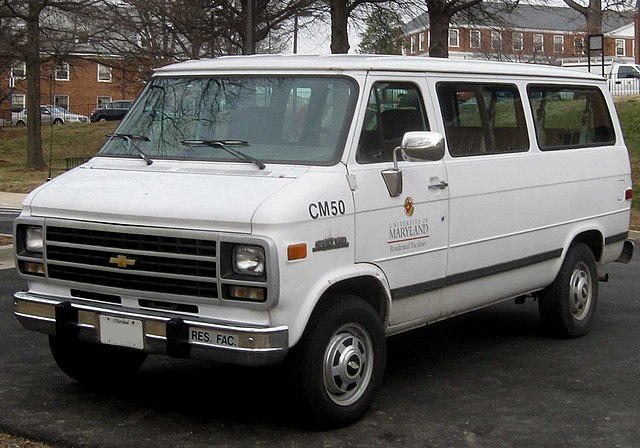

In [94]:
from IPython.display import Image

opel = Image('https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Opel_Manta_A_Front.jpg/640px-Opel_Manta_A_Front.jpg')
saab = Image('https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/1994-1997_Saab_9000_CD_2.3t_sedan_%282011-10-25%29_01.jpg/640px-1994-1997_Saab_9000_CD_2.3t_sedan_%282011-10-25%29_01.jpg')
bus = Image('https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/London_trolleybus.JPG/640px-London_trolleybus.JPG')
van = Image('https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Chevrolet_Sport_Van.jpg/640px-Chevrolet_Sport_Van.jpg')
display(opel, saab, bus, van)

Images taken from wikipedia

As it follows from the description of data, the features are gathered from images of cars. So, it is reasonable to take a look at the cars themselves (SAAB 9000, Opel Manta, Double-decker and Chevrolet Van).

I see two possibilities for confusions: opel with saab, and van with bus. Let's take a closer look at the confusion matrix!


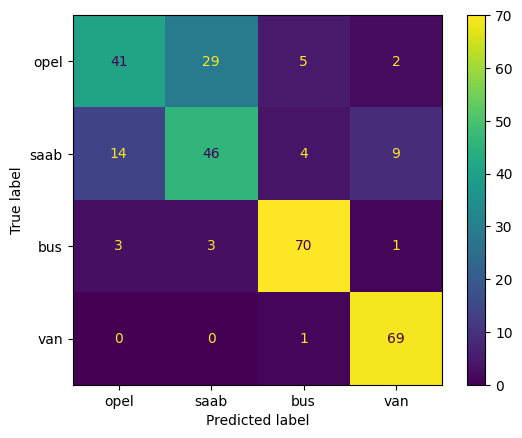

In [27]:
disp_confusion_matrix.plot()

So, indeed SAABs mix up with Opels, but Vans and Buses are distinguished.

(In fact, all the above could have been said judging just by confusion matrix, without the seemingly useless non-binary ROC.)

Let's assign a higher weight to SAAB and Opel classes --- since they are harder to recognize, it is reasonable to make the model fit them better.

In [28]:
def logreg_w(w, X, y, max_iter=500, C=1):
    m = LogisticRegression(solver='saga', tol=1e-3, max_iter=max_iter, C=C, class_weight=w) 
    m.fit(X, np.ravel(y))
    y_pred = m.predict(X)
    return m, f1_score(y_true=y, y_pred=y_pred, average='macro')

In [60]:
def label_weights(w_unnamed):
    return {labels_order[i] : w_unnamed[i] for i in range(4)}

def try_weight(w_unnamed=None, use_test=False, no_display=False, max_iter=500):
    if type(w_unnamed) is list:
        w = label_weights(w_unnamed)
    else:
        w = w_unnamed # to try default and balanced

    X = X_val_pd
    y = y_val
    if use_test:
        X = X_test_pd
        y = y_test

    mw, f1w = logreg_w(w, X, y, max_iter=max_iter)

    if no_display:
        return f1w

    
    y_pred_w = mw.predict(X)
    mk_confusion_matrix(y_true=y, y_pred=y_pred_w).plot()
    plt.title(f"F1 score on {'TEST' if use_test else 'val'} : {f1w} \n weights: {w} ")

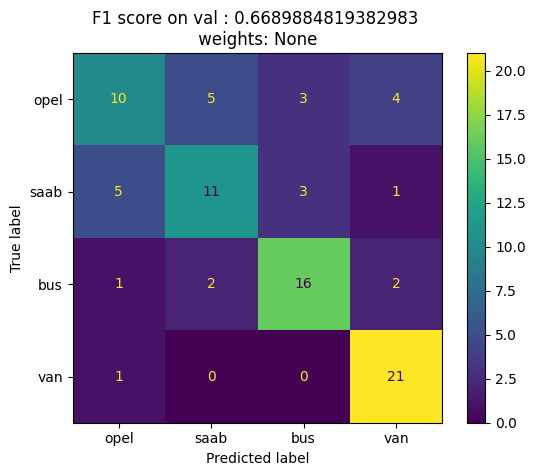

In [61]:
try_weight(max_iter=1000)

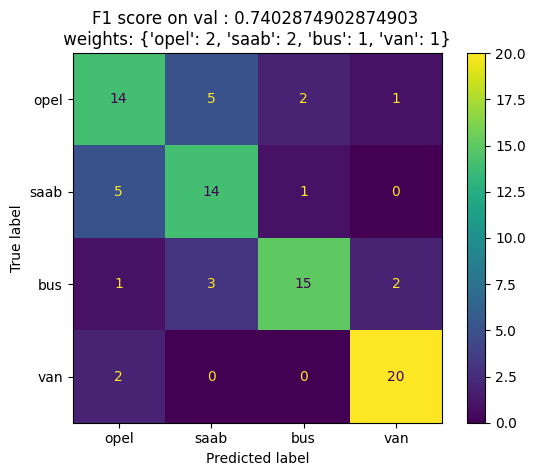

In [62]:
try_weight([2,2,1,1], max_iter=1000)

<s>The $F_1$-score increased!!! (a little :)))))</s> Not on this run.

Didn't quite do the trick, but that's OK. I want to try a bit more combinations before resorting to grid search

###### some experiments you may skip

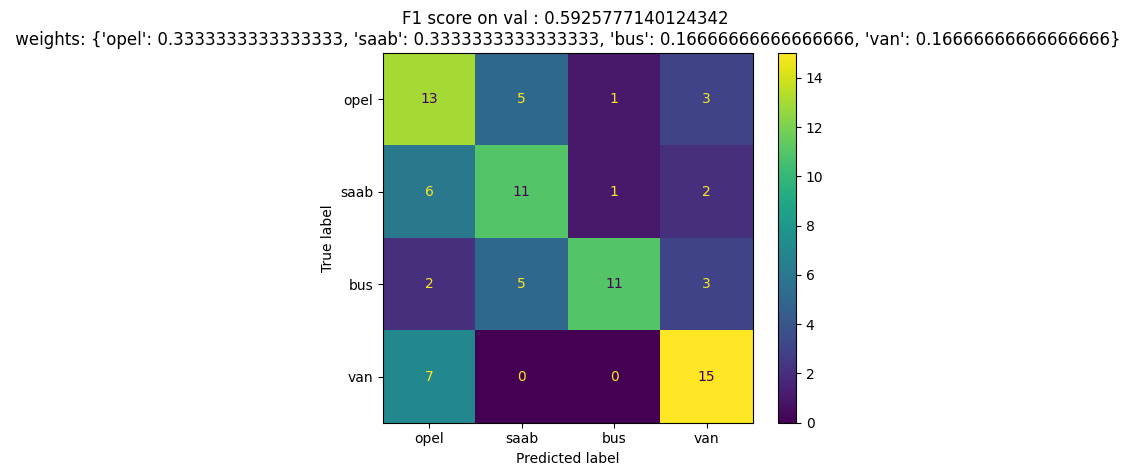

In [63]:
try_weight([2/6,2/6,1/6,1/6], max_iter=1000)

If we norm the weights, we get worse results. I guess, by dividing all weights (and, thus, the loss itself) by 6, we make the solver intolerant to some reasonable steps

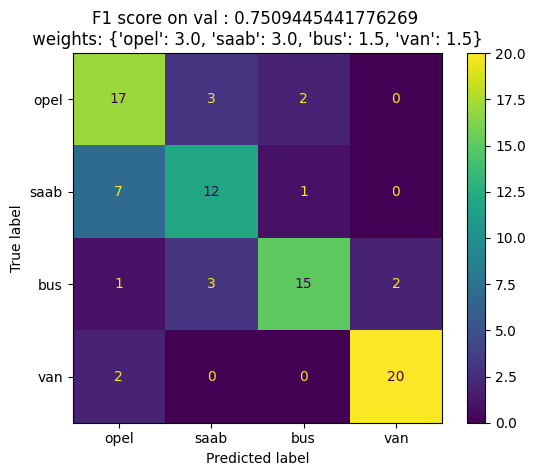

In [64]:
try_weight([2*1.5,2*1.5,1*1.5,1*1.5], max_iter=1000)

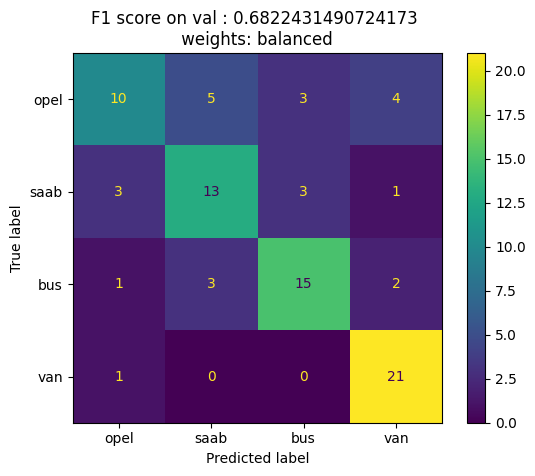

In [65]:
try_weight('balanced', max_iter=1000)

As expected, does not differ from default much, since classes are balanced.

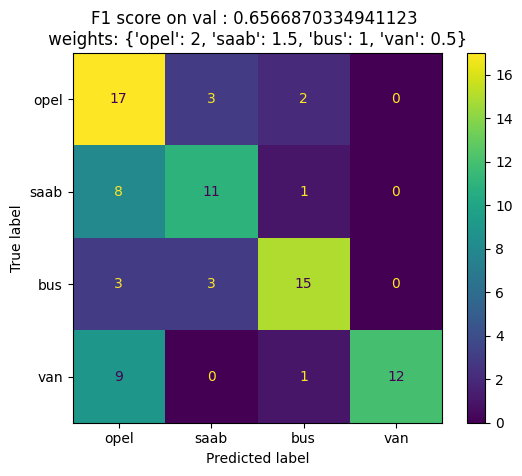

In [66]:
try_weight([2, 1.5, 1, 0.5], max_iter=1000)

No matter what I do, SAABs keep mixing into Opels. Sad! Let's see what's going on on test, just for fun

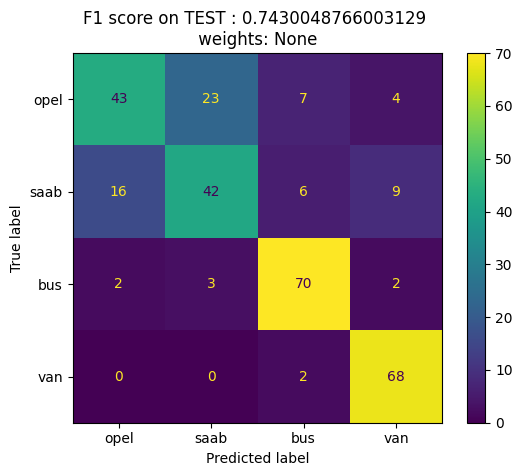

In [67]:
try_weight(use_test=True, max_iter=1000)

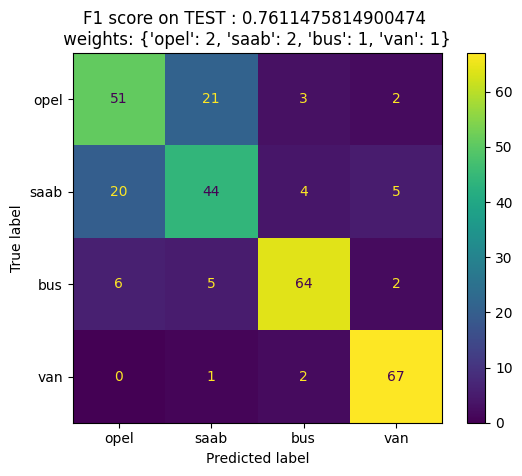

In [68]:
try_weight([2,2,1,1], use_test=True, max_iter=1000)

###### grid search

Very well, our last resort is grid search

In [38]:
def grid_search_weights(try_weight_fun, start=1, end=2, num=5, max_iter=1000):
    w_best_found = [1,1,1,1]
    f1w_best_found = try_weight_fun(w_unnamed=w_best_found, no_display=True, max_iter=max_iter)
    grid = np.linspace(start, end, num)
    for w1 in grid:
        for w2 in grid:
            for w3 in grid:
                for w4 in grid:
                    f1w = try_weight_fun(w_unnamed=[w1, w2, w3, w4], no_display=True, max_iter=max_iter)
                    if f1w > f1w_best_found:
                        f1w_best_found = f1w
                        w_best_found = [w1, w2, w3, w4]
    return w_best_found


In [39]:
w_best_found = grid_search_weights(try_weight)

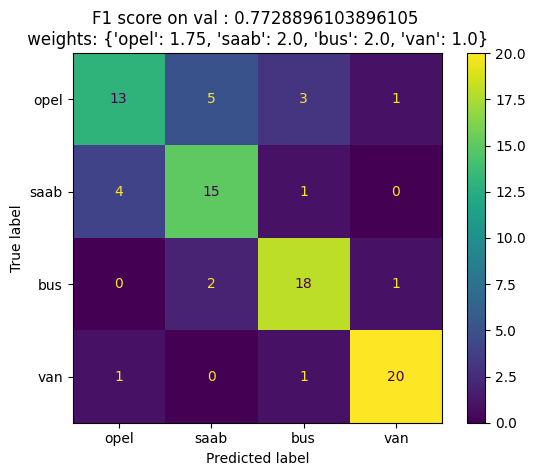

In [69]:
try_weight(w_best_found, max_iter=1000)

There is some improvement... Why the weights are the way they are, that I cannot explain

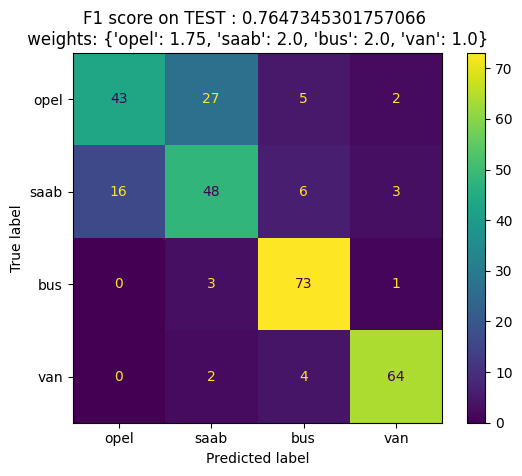

In [70]:
try_weight(w_best_found, use_test=True, max_iter=1000)

<s>(The well-reasoned $[2,2,1,1]$ outperforms the best found by a whole $1\%$ on test. Just saying.)</s> Not on this run, again. A $1\%$ improvement is just luck, which means I weren't smart enough with the choice of weights, and the dumb grid search did the same job. It's still better than the default weights, though.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pd)
X_val_scaled = scaler.transform(X_val_pd)
X_test_scaled = scaler.transform(X_test_pd)

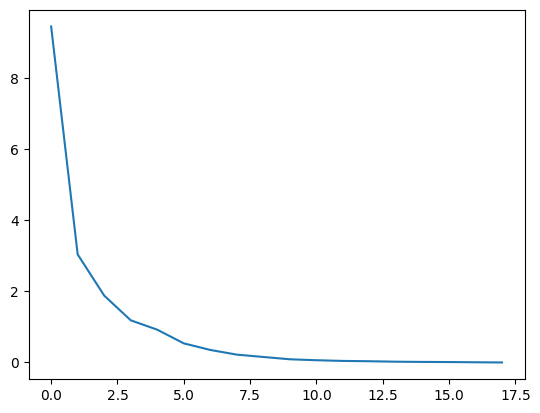

In [43]:
pca = PCA()
pca.fit(X_train_scaled)
plt.plot(pca.explained_variance_)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [44]:
np.cumsum(pca.explained_variance_)

array([ 9.44176627, 12.47937138, 14.35953392, 15.54523479, 16.46704056,
       17.00485542, 17.35726967, 17.57777893, 17.73276829, 17.82324643,
       17.88674802, 17.93068017, 17.96587037, 17.98812233, 18.00426397,
       18.01705435, 18.02334999, 18.02371542])

In [45]:
len(pca.explained_variance_)

18

Total explained variance should equal the number of features. We have approximately that

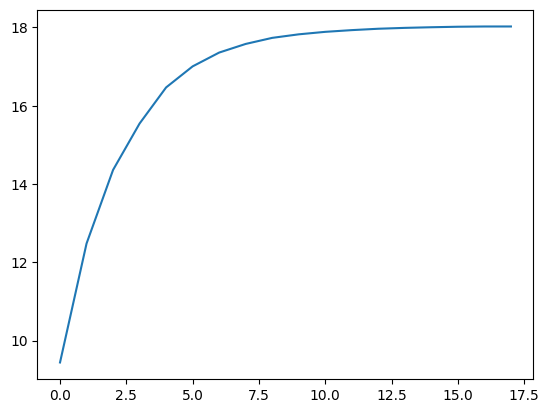

In [46]:
plt.plot(np.cumsum(pca.explained_variance_))

In [47]:
np.cumsum(pca.explained_variance_)[:9]

array([ 9.44176627, 12.47937138, 14.35953392, 15.54523479, 16.46704056,
       17.00485542, 17.35726967, 17.57777893, 17.73276829])

The first half of singular vectors explains almost all variance, so we can reduce 18 dimensions to 9

In [48]:
pca_half = PCA(9)
X_train_pca = pca_half.fit_transform(X_train_scaled)
X_val_pca= pca_half.transform(X_val_scaled)
X_test_pca= pca_half.transform(X_test_scaled)

In [49]:
X_train_pca

array([[ 4.38163913e-01,  5.46377576e-01,  1.49299916e-01, ...,
         6.37006508e-03, -1.51373684e-02, -4.61858902e-02],
       [-8.13204531e-01,  1.27390038e+00, -1.15277930e-01, ...,
        -3.80973050e-04, -8.95276767e-01,  3.62800742e-01],
       [-1.09975366e-02, -7.65146832e-01,  5.76775701e-01, ...,
        -6.27167151e-01,  3.20938243e-01, -3.07077433e-01],
       ...,
       [ 4.18133335e+00, -8.55181076e-01, -2.54041109e-01, ...,
        -1.02263087e-01,  1.59810821e-01, -1.64756462e-01],
       [-3.04973321e+00, -5.82311350e-01, -3.93825230e-01, ...,
         1.05582782e+00,  7.69787967e-01, -1.06727936e+00],
       [ 1.12259706e+00,  1.10467556e+00, -1.54264896e-01, ...,
         1.06442445e+00, -4.78225128e-01, -4.14127166e-01]])

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Although the number of components is, technically, a hyperparameter, grid searching does not make sense as we trade precision for time when reducing components; thus, this parameter does not optimize precision

In [50]:
def logreg_w_pca(w, max_iter):
    mpca = LogisticRegression(solver='saga', tol=1e-3, max_iter=max_iter, class_weight=w)
    mpca.fit(X_train_pca, np.ravel(y_train))
    y_pred = mpca.predict(X_val_pca)
    return mpca, f1_score(y_true=y_val, y_pred=y_pred, average='macro')


def try_weight_pca(w_unnamed=None, no_display=False, max_iter=500):
    if type(w_unnamed) is list:
        w = label_weights(w_unnamed)
    else:
        w = w_unnamed # to try default and balanced

    mpca, f1pca = logreg_w_pca(w, max_iter=max_iter)
    return f1pca
    

In [51]:
w_best_found_pca = grid_search_weights(try_weight_pca, max_iter=1000)

c:\Users\Игорь\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Игорь\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Игорь\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Игорь\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Игорь\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

In [52]:
try_weight_pca(w_best_found_pca)

0.73851136907091

Well, we found _some_ weights, not all of them were computed properly, for some reason (although, the documentation promised good convergence for similarly scaled features). The one that was found does not yield a warning. Still worse than before PCA, though

In [53]:
mpca, f1pca_val = logreg_w_pca(label_weights(w_best_found_pca), max_iter=1000)
f1pca_val

0.73851136907091

In [54]:
y_pred_pca = mpca.predict(X_test_pca)
y_pred_pca_proba = mpca.predict_proba(X_test_pca)

In [55]:
f1_macro = f1_score(y_true=y_test, y_pred=y_pred_pca, average='macro')
f1_micro = f1_score(y_true=y_test, y_pred=y_pred_pca, average='micro')
print(f'macro: {f1_macro}, micro=acc: {f1_micro}')

macro: 0.6989651838625113, micro=acc: 0.7037037037037037


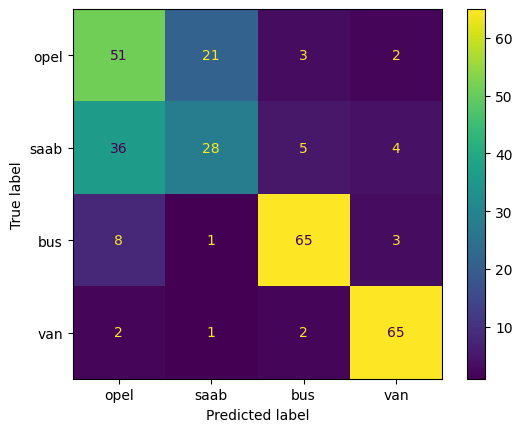

In [56]:
disp_confusion_matrix = mk_confusion_matrix(y_true=y_test, y_pred=y_pred_pca)
disp_confusion_matrix.plot()

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

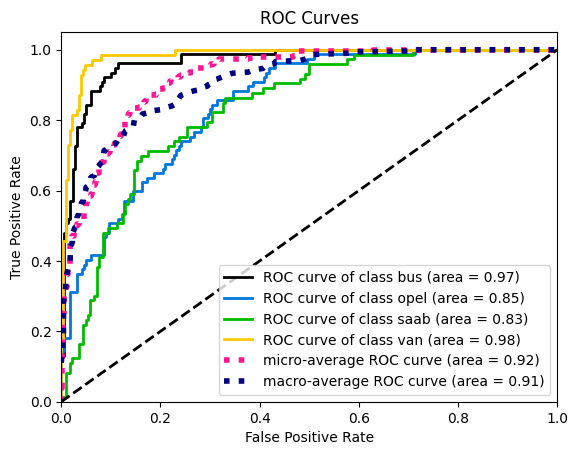

In [57]:
scikitplot.metrics.plot_roc(y_true=y_test, y_probas=y_pred_pca_proba)

Well, PCA IS a trade-off, so worse plots are no surprise. Since the no-PCA solution is quite fast, it is hard to measure whether it was worth it or not. However, we will see this in the next section

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

Tip: there's a function in sklern to do that

In [139]:
def custom_score_estXy(score, est, X, y, score_kw=None):
    if score_kw is None:
        score_kw = {}
    return score(y_true=y, y_pred=est.predict(X), **score_kw)

def accuracy_estXy(est, X, y):
    return custom_score_estXy(accuracy_score, est, X, y)

def macrof1_estXy(est, X, y):
    return custom_score_estXy(f1_score, est, X, y, score_kw={'average': 'macro'})

def show_learning_curves(est, name, X, y, shuffle=True):
    lc_params = {
        "X": X,
        "y": np.ravel(y),
        "train_sizes": np.linspace(0.1, 1.0, 10),
        "line_kw": {"marker": "o"},
    }

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

    LearningCurveDisplay.from_estimator(est, shuffle=shuffle, **lc_params, 
                                        scoring=accuracy_estXy, score_name="Accuracy", ax=ax[0])
    LearningCurveDisplay.from_estimator(est, shuffle=shuffle, **lc_params, 
                                        scoring=macrof1_estXy, score_name="macro F_1", ax=ax[1])
    fig.suptitle(f"{name} \n shuffle {'ON' if shuffle else 'OFF'}")

In [140]:
est_w = LogisticRegression(solver='saga', tol=1e-3, max_iter=1000, C=1, class_weight=label_weights(w_best_found)) 

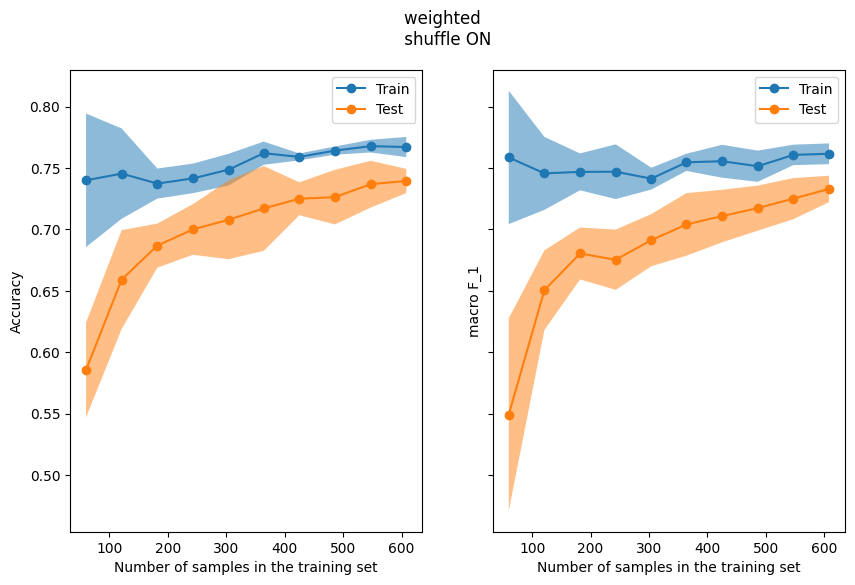

In [141]:
show_learning_curves(est_w, 'weighted', X_train_pd, y_train)

In [137]:
est_pca = LogisticRegression(solver='saga', tol=1e-3, max_iter=5000, C=1, class_weight=label_weights(w_best_found_pca)) 

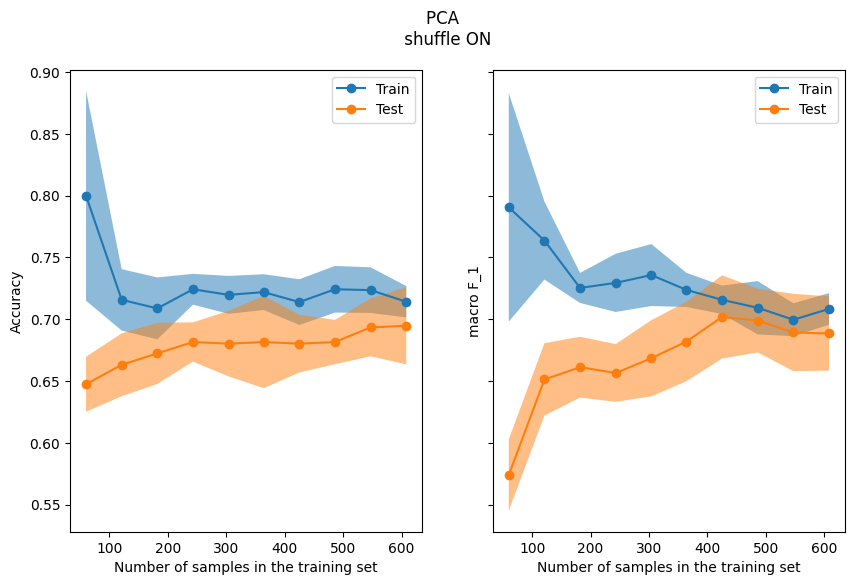

In [144]:
show_learning_curves(est_pca, 'PCA', X_train_pca, y_train)

The PCA's "limit score" is around $0.7$, as long as non-PCA's is $0.75$. However, learning curve building for PCA was $3-3.5$ times faster than for non-PCA; so the trade-off occured, indeed.

Let's try doing no shuffle. I heard, generally, it's a bad practice. Let's see, why

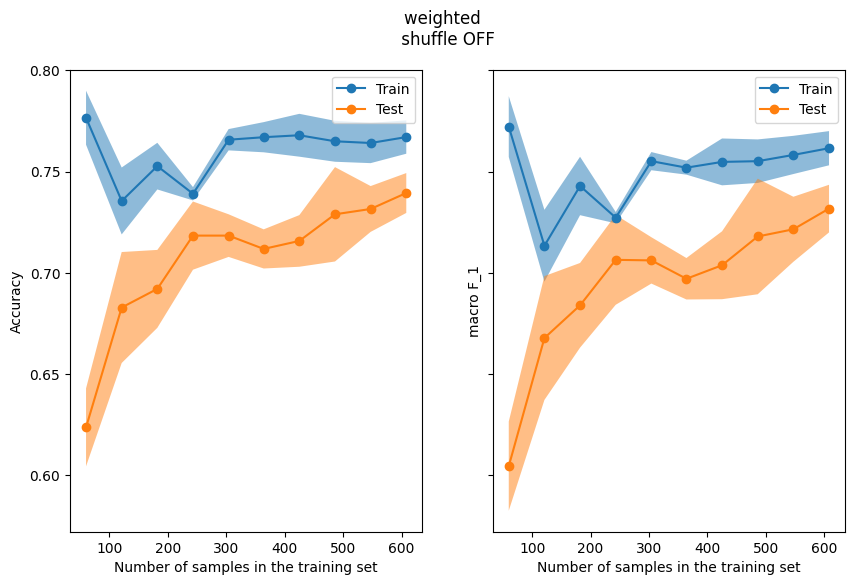

In [143]:
show_learning_curves(est_w, 'weighted', X_train_pd, y_train, shuffle=False)

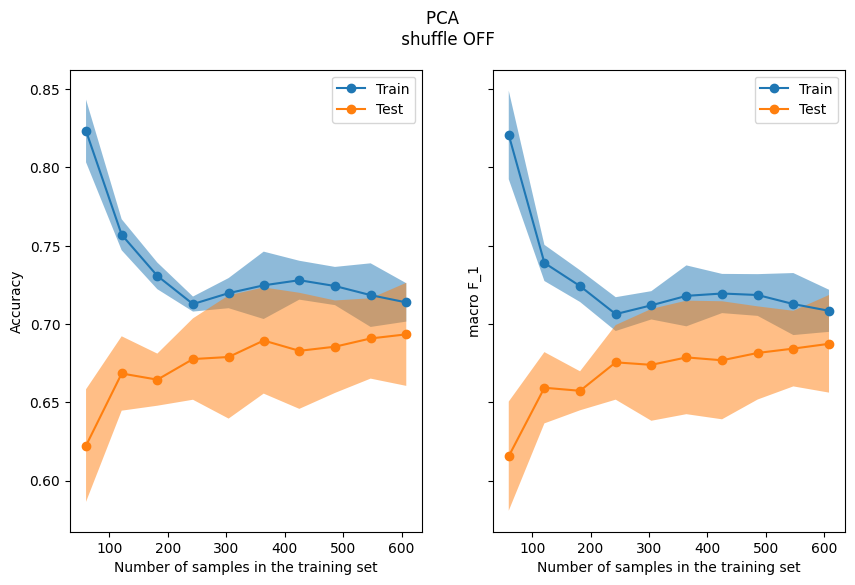

In [145]:
show_learning_curves(est_pca, 'PCA', X_train_pca, y_train, shuffle=False)